In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

2024-09-26 00:21:29.135413: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 00:21:29.135523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 00:21:29.139824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 00:21:29.164247: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
# List all physical devices recognized by TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
print("Available GPUs:", physical_devices)
if gpus :
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 20)])

    except RuntimeError as e:
        print(e)

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-09-26 00:21:38.412631: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-26 00:21:38.440930: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-26 00:21:38.445910: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Reshape images to include channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [6]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [7]:
#  Compile the model
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2024-09-26 00:21:40.422846: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-26 00:21:40.427888: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-26 00:21:40.432882: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
# Callbacks and training
checkpoint = ModelCheckpoint('handdesigned_model.h5', save_best_only=True, monitor='val_loss')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_split=0.2, 
                    callbacks=[checkpoint, early_stopping],
                    batch_size=256
                   )

Epoch 1/20


2024-09-26 00:21:46.917015: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-09-26 00:21:48.294792: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f95c088fc90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-26 00:21:48.294870: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-09-26 00:21:48.314155: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1727310108.658330     933 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 [==============================] - 13s 23ms/step - loss: 0.7031 - accuracy: 0.7442 - val_loss: 0.4853 - val_accuracy: 0.8239
Epoch 2/20
  1/188 [..............................] - ETA: 2s - loss: 0.5534 - accuracy: 0.8008

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/188 [==============================] - 3s 14ms/step - loss: 0.4203 - accuracy: 0.8464 - val_loss: 0.3751 - val_accuracy: 0.8618
Epoch 3/20
188/188 [==============================] - 3s 14ms/step - loss: 0.3544 - accuracy: 0.8718 - val_loss: 0.3354 - val_accuracy: 0.8763
Epoch 4/20
188/188 [==============================] - 3s 14ms/step - loss: 0.3202 - accuracy: 0.8836 - val_loss: 0.3201 - val_accuracy: 0.8832
Epoch 5/20
188/188 [==============================] - 3s 14ms/step - loss: 0.2907 - accuracy: 0.8939 - val_loss: 0.3047 - val_accuracy: 0.8881
Epoch 6/20
188/188 [==============================] - 3s 14ms/step - loss: 0.2696 - accuracy: 0.9015 - val_loss: 0.2894 - val_accuracy: 0.8944
Epoch 7/20
188/188 [==============================] - 3s 14ms/step - loss: 0.2492 - accuracy: 0.9085 - val_loss: 0.2841 - val_accuracy: 0.8963
Epoch 8/20
188/188 [==============================] - 3s 14ms/step - loss: 0.2421 - accuracy: 0.9108 - val_loss: 0.2694 - val_accuracy: 0.8996
Epoch 9/20

In [9]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 3s 7ms/step - loss: 0.2935 - accuracy: 0.9066
Test accuracy: 0.9066


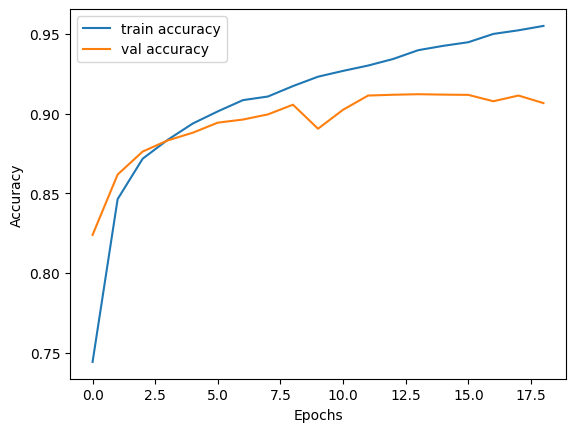

In [10]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Save the model architecture plot
tf.keras.utils.plot_model(model, to_file='handdesigned_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
